In [176]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import scipy.stats
import pandas as pd
sns.set()

In [177]:
data = pd.read_csv('zad1_lista1.txt', delim_whitespace=True, header=None)  # zakładam, że dane są oddzielone tabulatorem

In [178]:
data

,0,1
0,0.204906,-3.220550
1,0.098946,-1.125868
2,2.063672,12.928829
3,0.090608,6.917862
4,0.458298,-0.604774
...,...,...
995,0.453089,2.768413
996,0.050352,1.632900
997,0.812011,7.231839
998,2.813097,6.268761


In [179]:
x=data[0]
y=data[1]

Text(0.5, 1.0, 'Wykres rozproszenia')

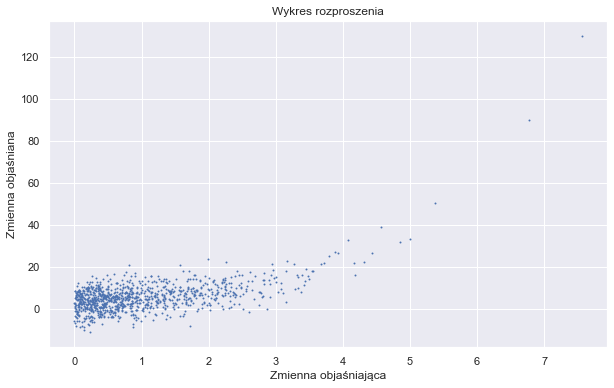

In [180]:
plt.figure(figsize=(10,6))
plt.scatter(x,y, s=0.9)
plt.xlabel('Zmienna objaśniająca')
plt.ylabel('Zmienna objaśniana')
plt.title('Wykres rozproszenia')

c:\Users\jakub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jakub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jakub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Wykres rozproszenia i prosta dopasowująca')

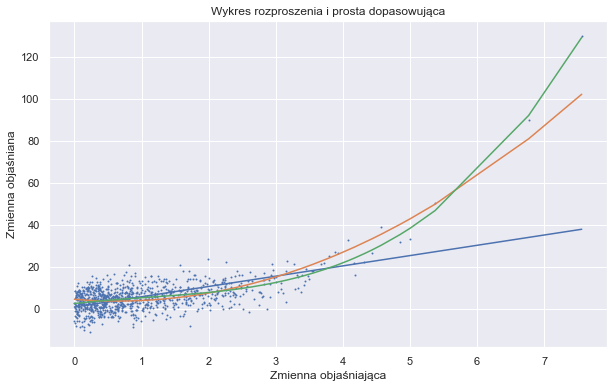

In [181]:
x_sorted=np.sort(x)
y_sorted=np.sort(y)
coef = np.polyfit(x,y,1)
coef2 = np.polyfit(x,y,2)
coef3 = np.polyfit(x,y,3)

poly1d_fn = np.poly1d(coef)
poly1d_fn2 = np.poly1d(coef2)
poly1d_fn3 = np.poly1d(coef3)

plt.figure(figsize=(10,6))
plt.scatter(x, y, s=0.9)
sns.lineplot(x, poly1d_fn(x))
sns.lineplot(x, poly1d_fn2(x))
sns.lineplot(x,poly1d_fn3(x))
plt.xlabel('Zmienna objaśniająca')
plt.ylabel('Zmienna objaśniana')
plt.title('Wykres rozproszenia i prosta dopasowująca')

# Zad 2

In [182]:
data2 = pd.read_csv('zad2_lista1.txt', delim_whitespace=True, header=None)

In [183]:
data2

,0
0,1.838676
1,1.855805
2,0.697521
3,1.296238
4,0.755621
...,...
9995,-0.264952
9996,1.841796
9997,-0.019291
9998,0.016198


In [184]:
def moving_average(x, p):
    return [np.mean(x[i - p : i + p + 1]) for i in range(p, len(x) - p)]


In [185]:
a=moving_average(data2,11)
b=moving_average(data2,25)
c=moving_average(data2,49)

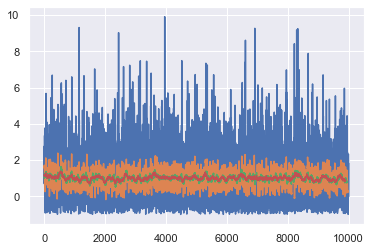

In [186]:
plt.plot(data2)
plt.plot(a)
plt.plot(b)
plt.plot(c)

# Zad 3

In [187]:
x = pd.read_table("zad2_lista1.txt", sep=r"\s+", header=None, names=["x"])
y = pd.read_table("zad3_lista1.txt", sep=r"\s+", header=None, names=["y"])
df = pd.concat([x, y], axis=1)

In [188]:
df

,x,y
0,1.838676,53.341964
1,1.855805,42.770981
2,0.697521,19.559566
3,1.296238,49.174287
4,0.755621,38.698249
...,...,...
9995,-0.264952,15.243152
9996,1.841796,61.493194
9997,-0.019291,-13.723898
9998,0.016198,25.326425


In [189]:
def linear_regression(data):
    b1 = np.sum((data["x"] - data["x"].mean()) * (data["y"] - data["y"].mean())) / np.sum((data["x"] - data["x"].mean())**2)
    b0 = data["y"].mean() - b1 * data["x"].mean()
    return b0, b1

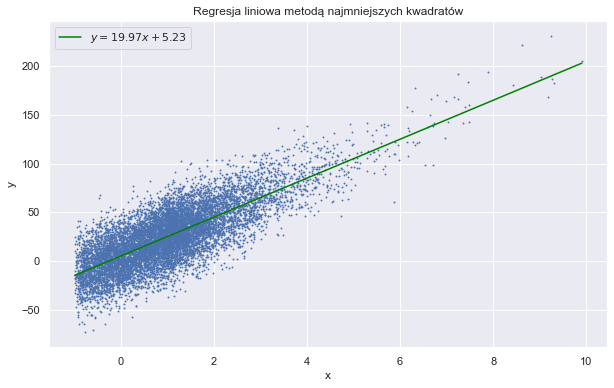

In [190]:
def plot_regression(data, title):
    b0, b1 = linear_regression(data)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data["x"], data["y"], s=0.8)
    
    xs = np.linspace(data["x"].min(), data["x"].max(), 1000)
    ys = b0 + b1 * xs
    plt.plot(xs, ys, color="green", label=r"$y = {:.2f}x + {:.2f}$".format(b1, b0))
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.legend()
    plt.show()

plot_regression(df, "Regresja liniowa metodą najmniejszych kwadratów")

In [191]:
def moving_average(data, window_size):
    return data.rolling(window=window_size).mean().dropna()

In [192]:
x_smoothed = moving_average(df["x"], 11)
y_smoothed = moving_average(df["y"], 11)
df_smoothed = pd.DataFrame({"x": x_smoothed, "y": y_smoothed})

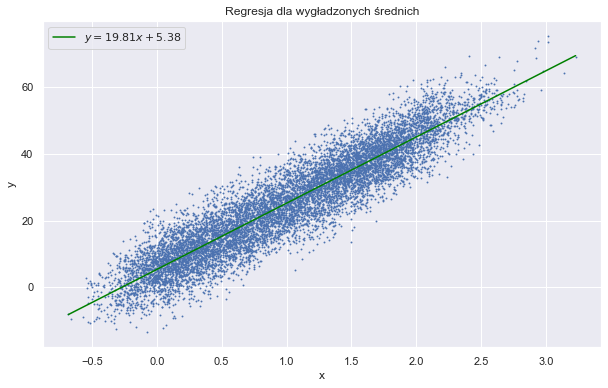

In [193]:
plot_regression(df_smoothed, "Regresja dla wygładzonych średnich")

# Zad 4

In [194]:
data4 = pd.read_csv('zad4_lista1.txt', delim_whitespace=True, header=None, names=["x","y"]) 

In [195]:
def linear_regression_with_residuas(data):
    b1 = np.sum((data["x"] - data["x"].mean()) * (data["y"] - data["y"].mean())) / np.sum((data["x"] - data["x"].mean())**2)
    b0 = data["y"].mean() - b1 * data["x"].mean()

    data["residuals"]=data["y"]-(b1*data["x"]+b0)

    prog=1.5*data["residuals"].std() #odchylenie standardowe
    outliers=data[np.abs(data["residuals"])>prog]

    data_clean=data.drop(outliers.index)

    b1_new=np.sum((data_clean["x"] - data_clean["x"].mean()) * (data_clean["y"] - data_clean["y"].mean())) / np.sum((data_clean["x"] - data_clean["x"].mean())**2)
    b0_new=data_clean["y"].mean() - b1_new * data_clean["x"].mean()

    return b0_new, b1_new, outliers, data_clean

In [196]:
b0, b1, outliers, data_clean = linear_regression_with_residuas(data4)

In [197]:
outliers

,x,y,residuals
5,-1.882981,-125.290020,-91.825644
6,2.226575,-28.832421,-79.937908
18,-10.252211,-115.212910,90.480434
32,-0.505537,-111.201550,-106.083369
34,1.360094,104.768900,71.494575
...,...,...,...
977,-0.654280,-81.209883,-73.030750
982,-0.085892,-68.733969,-72.251588
989,0.118129,123.841740,116.125604
996,-4.104326,-163.661010,-84.483953


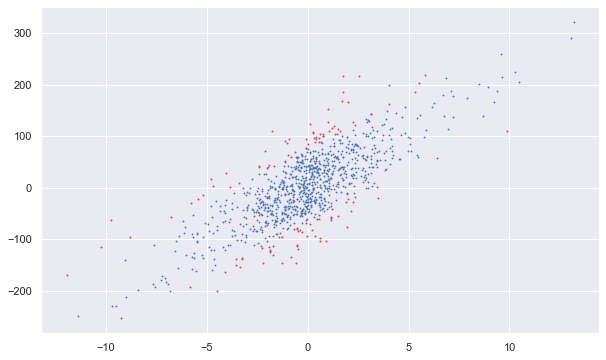

In [198]:
plt.figure(figsize=(10, 6))
plt.scatter(outliers["x"],outliers["y"],s=0.9, color='r')
plt.scatter(data_clean["x"],data_clean["y"], s=0.7)

In [199]:
def plot_regression_residuas(data, title):
    b0, b1 = linear_regression_with_residuas(data)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data["x"], data["y"], s=0.8)
    
    xs = np.linspace(data["x"].min(), data["x"].max(), 1000)
    ys = b0 + b1 * xs
    plt.plot(xs, ys, color="green", label=r"$y = {:.2f}x + {:.2f}$".format(b1, b0))
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.legend()
    plt.show()

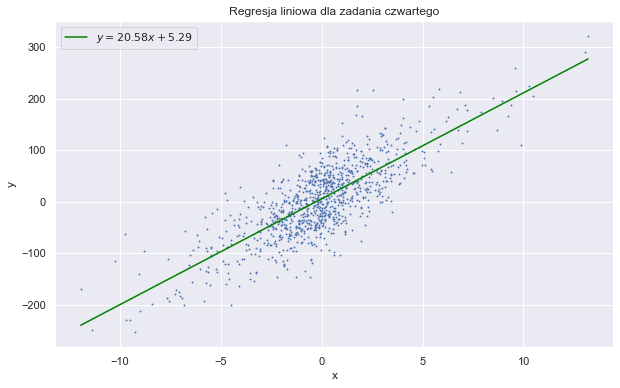

In [200]:
plot_regression(data4, "Regresja liniowa dla zadania czwartego")

# Zad 5

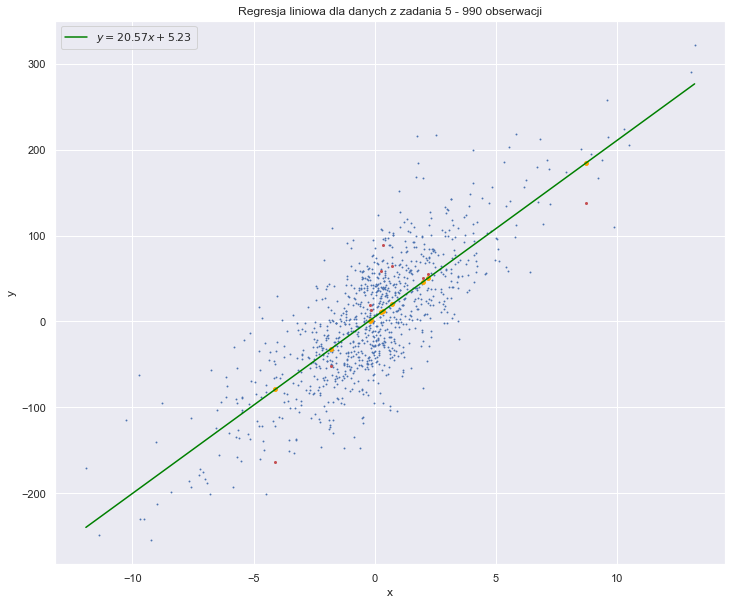

In [201]:
data5=data4[:990]
data5_10=data4[990:]

b0,b1=linear_regression(data5)

plt.figure(figsize=(12, 10))
plt.scatter(data5["x"], data5["y"], s=0.8)
plt.scatter(data5_10["x"],data5_10["y"],s=4, color='r')


xs = np.linspace(data5["x"].min(), data5["x"].max(), 1000)
ys = b0 + b1 * xs
ys_predicted=b0+b1*data5_10["x"]
plt.plot(xs, ys, color="green", label=r"$y = {:.2f}x + {:.2f}$".format(b1, b0))

plt.scatter(data5_10["x"], ys_predicted, s=15.0, color='orange')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresja liniowa dla danych z zadania 5 - 990 obserwacji")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Błąd')

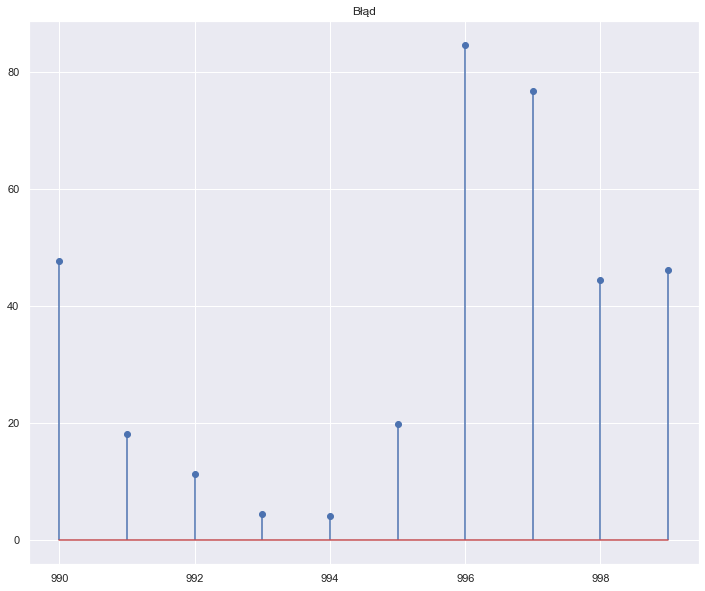

In [202]:
plt.figure(figsize=(12, 10))
plt.stem(data5_10.index, np.abs(data5_10["y"]-ys_predicted))
plt.title("Błąd")

# Zad 6

In [203]:
data6 = pd.read_csv('zad6_lista1.txt', delim_whitespace=True, header=None, names=["x","y"]) 

In [204]:
data6

,x,y
0,-0.741731,2.289068
1,-0.851927,0.878991
2,0.861910,9.205162
3,0.441435,5.820230
4,1.649402,45.163982
...,...,...
995,0.100908,1.440774
996,0.468749,7.870679
997,-0.604164,0.855823
998,-0.122639,4.099121


Text(0.5, 1.0, 'Dane z zadania 6')

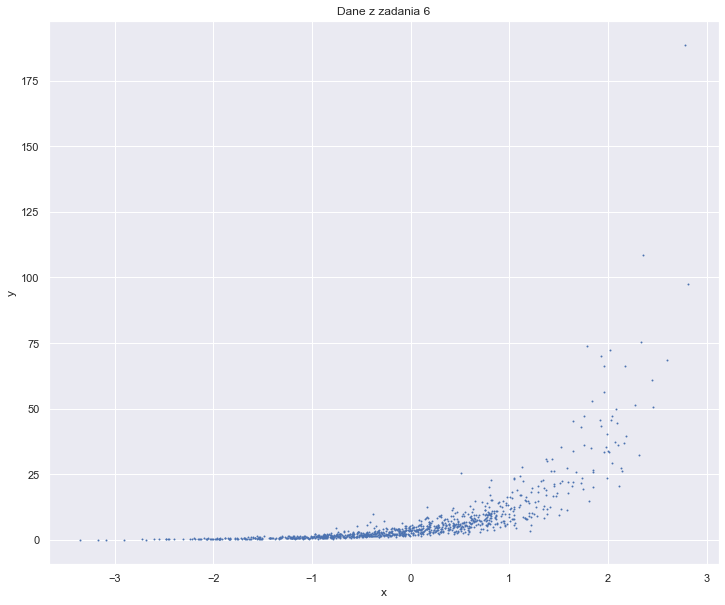

In [205]:
plt.figure(figsize=(12,10))
plt.scatter(data6["x"],data6["y"], s=0.9)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dane z zadania 6")

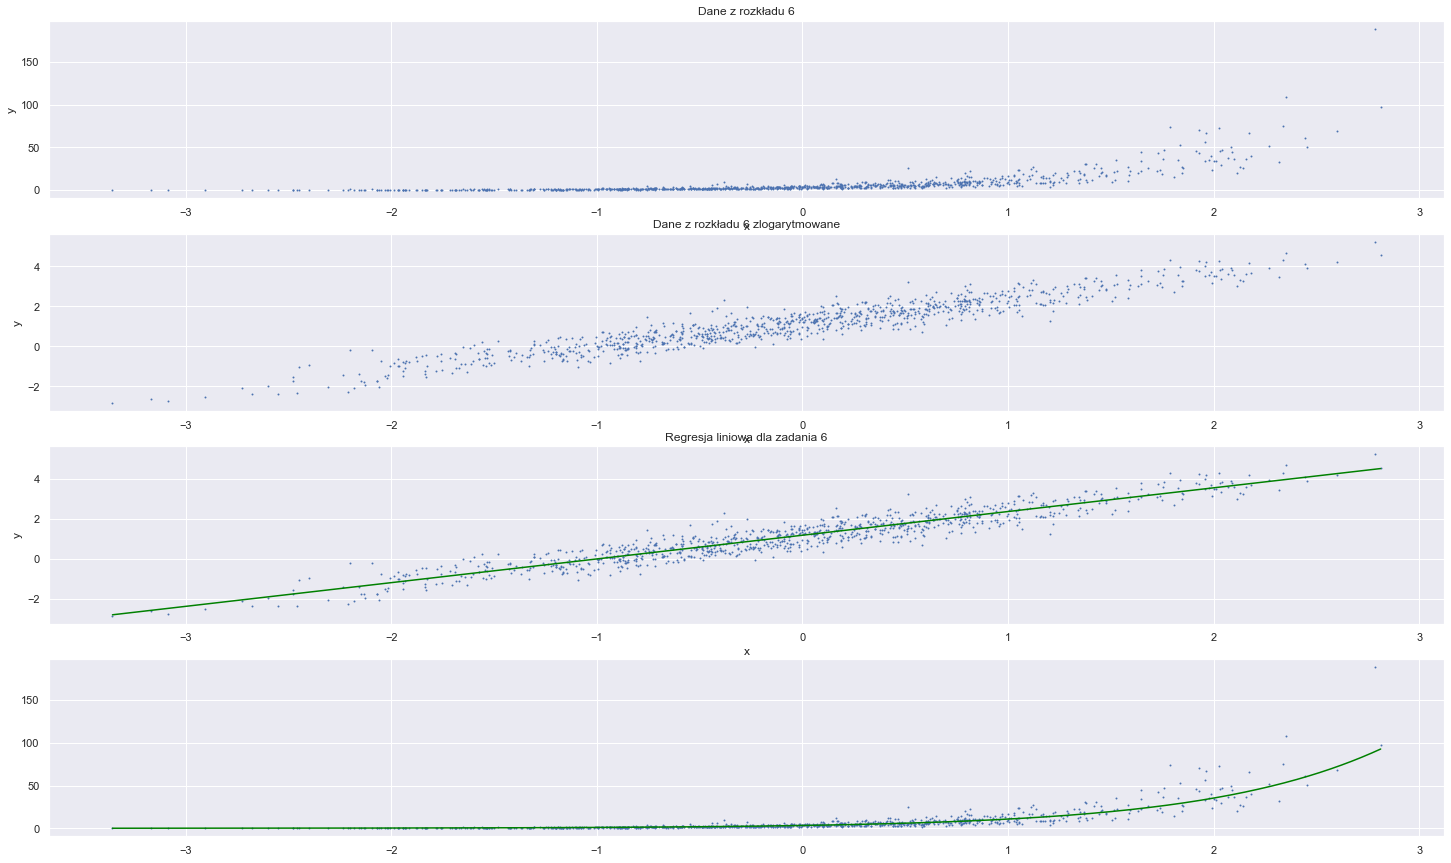

In [232]:
b1 = np.sum((data6["x"] - data6["x"].mean()) * (np.log(data6["y"]) - np.log(data6["y"].mean()))) / np.sum((data6["x"] - data6["x"].mean())**2)
b0 = np.log(data6["y"]).mean() - b1 * data6["x"].mean()

xs = np.linspace(data6["x"].min(), data6["x"].max(), 1000)
ys = b0 + b1 * xs
ys_exp = np.exp(ys)

fig,axs=plt.subplots(nrows=4, ncols=1, figsize=(25,15))
axs[0].scatter(data6["x"],data6["y"], s=0.9)
axs[3].scatter(data6["x"],data6["y"], s=0.9)

axs[0].set_title("Dane z rozkładu 6")

axs[0].set_xlabel("x")
axs[1].set_xlabel("x")
axs[2].set_xlabel("x")

axs[0].set_ylabel("y")
axs[1].set_ylabel("y")
axs[2].set_ylabel("y")

axs[1].scatter(data6["x"],np.log(data6["y"]),s=0.9)
axs[2].scatter(data6["x"],np.log(data6["y"]),s=0.9)
axs[1].set_title("Dane z rozkładu 6 zlogarytmowane")
axs[2].plot(xs, ys, color="green", label=r"$y = {:.2f}x + {:.2f}$".format(b1, b0))
axs[2].set_title("Regresja liniowa dla zadania 6")

axs[3].plot(xs,ys_exp, color="green", label=r"$y = {:.2f}x + {:.2f}$".format(b1, b0))